# Home Credit Default Risk Analysis and Modeling

## Importing Libraries
We are using core data science library stack:
- numpy
- pandas
- sklearn
- matplotlib
- seaborn

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Read Training dataset

In [9]:
application_train_df = pd.read_csv('assets/application_train.csv')
print(f'Training dataset has {application_train_df.shape[0]} rows and {application_train_df.shape[1]} columns')
application_train_df.head(10)

Training dataset has 307511 rows and 122 columns


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

### Check null Values by Column

In [10]:
def null_values_analisis(_df: pd.DataFrame) -> pd.DataFrame:
    ''' This function returns a DataFrame with the count and percentage of missing values in a DataFrame '''
    
    null_values = _df.isnull().sum()
    null_values_percentage = (null_values / _df.shape[0])*100
    
    null_values_by_column = pd.concat([null_values, null_values_percentage], axis=1)
    null_values_by_column.columns = ['Missing Values (COUNT)', 'Missing Values (%)']
    
    null_values_by_column = null_values_by_column[null_values_by_column['Missing Values (COUNT)'] != 0]
    
    return null_values_by_column.sort_values(ascending=False, by='Missing Values (%)')

application_train_null_values_df = null_values_analisis(application_train_df)
application_train_null_values_df.head(50)

,Missing Values (COUNT),Missing Values (%)
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


Apparently all the columns that have the suffix _AVG, _MEDI, _MODE, have a very large level of null values ​​and according to the documentation by the Competition from Kaggle, it refers to statistically normalized data but they still apparently do not have an important weight, we could consider removing them from the sample because they cannot provide any significant value or trend

In [11]:
cols_to_drop = application_train_df.columns[application_train_df.columns.str.contains(r'(_AVG$|_MODE$|_MEDI$)')]
# Eliminar las columnas seleccionadas
application_train_df.drop(columns=cols_to_drop, inplace=True)

C:\Users\alejo\AppData\Local\Temp\ipykernel_32512\2888977648.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cols_to_drop = application_train_df.columns[application_train_df.columns.str.contains(r'(_AVG$|_MODE$|_MEDI$)')]


### Checking Column Data Types

We first see how many different types of data there are and how many each one has

In [12]:
application_train_df.dtypes.value_counts()

int64      41
float64    22
object     12
Name: count, dtype: int64

We will first identify which columns are of type `object` given that they present alphanumeric characters which when analyzing them or even building a predictive AI model or data selection we need to handle them as values

In [13]:
# Check String columns to see unque values and detect categorical columns
application_train_dtypes_df = application_train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

application_train_dtypes_df

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

We want create a standard in the development of the project by ensuring that columns with unique values ​​equal to 2 are handled with label-encondig and the others that are higher are handled with One Hot Encoding and Why? prevent the transition from textual to numerical characteristics from generating a numerical weight that does not exist in the columns and avoid blindness, but as a first step we must identify for columns with 3 unique values ​​if they can be reduced to 2

### Check and Normalize CODE_GENDER

In [14]:
print(application_train_df['CODE_GENDER'].value_counts())
print('='*5, 'NORMALIZE', '='*5)
# PUEDE SER FILLEADO
application_train_df['CODE_GENDER'] = application_train_df['CODE_GENDER'].replace('XNA', 'F')
print('='*20)
print(application_train_df['CODE_GENDER'].value_counts())

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
===== NORMALIZE =====
CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64


### Label Encoding and One Hot Encoding (OHE)

In the end we will obtain more columns but more "digestible" for the development of the project

In [15]:
# Label encoding for categoric columns who have as max 2 unique values
label_encoder = LabelEncoder()

for categoric_col in application_train_dtypes_df.index:
    if (len(list(application_train_df[categoric_col])) <= 2):
        label_encoder.fit(application_train_df[categoric_col])
        application_train_df[categoric_col] = label_encoder.transform(application_train_df[categoric_col])

# for other categoric columns we will use OHE
application_train_df = pd.get_dummies(application_train_df)

print('Training dataset shape with OHE application:', application_train_df.shape)

Training dataset shape with OHE application: (307511, 186)


### Check and Drop Outliers

In [16]:
# Función para eliminar anomalías por Z-score en una columna específica
def remove_anomalies(df, columna, umbral=2):
    z_scores = np.abs((df[columna] - df[columna].mean()) / df[columna].std())
    print(z_scores.max())
    filtro = z_scores <= umbral
    return df[filtro]

# Aplicar la función para eliminar anomalías en la columna 'columna_float'
application_train_df = remove_anomalies(application_train_df, 'DAYS_BIRTH')
application_train_df = remove_anomalies(application_train_df, 'DAYS_EMPLOYED')
application_train_df = remove_anomalies(application_train_df, 'AMT_INCOME_TOTAL')
print(application_train_df)

2.106331090371306
2.15460499023154
451.2219147191554
        SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307504      456248       0             0          153000.0    331920.0   
307506      456251       0             0          157500.0    254700.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RE

## Exploratory Data Analysis (EDA)
### Data Classification with random forest

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

X = application_train_df.drop('TARGET', axis=1)
X_cols = X
Y = application_train_df['TARGET']
sc = StandardScaler()
X = sc.fit_transform(X)

X_application_train, X_application_test, Y_application_train, Y_application_test = train_test_split(X, Y, test_size=0.3, random_state=42)

cl_rf = RandomForestClassifier()
cl_rf.fit(X_application_train, Y_application_train)

Y_hat_rf = cl_rf.predict(X_application_test)
accuracy = accuracy_score(Y_application_test, Y_hat_rf)
print("Accuracy:", accuracy)

Accuracy: 0.912593673320512


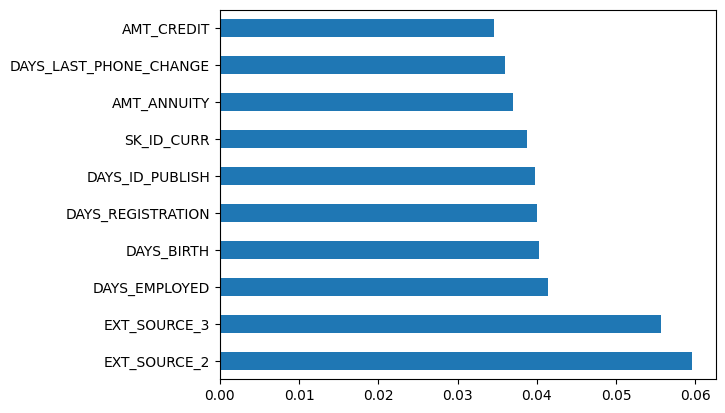

In [18]:
feature_importances = pd.Series(cl_rf.feature_importances_, index=X_cols.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

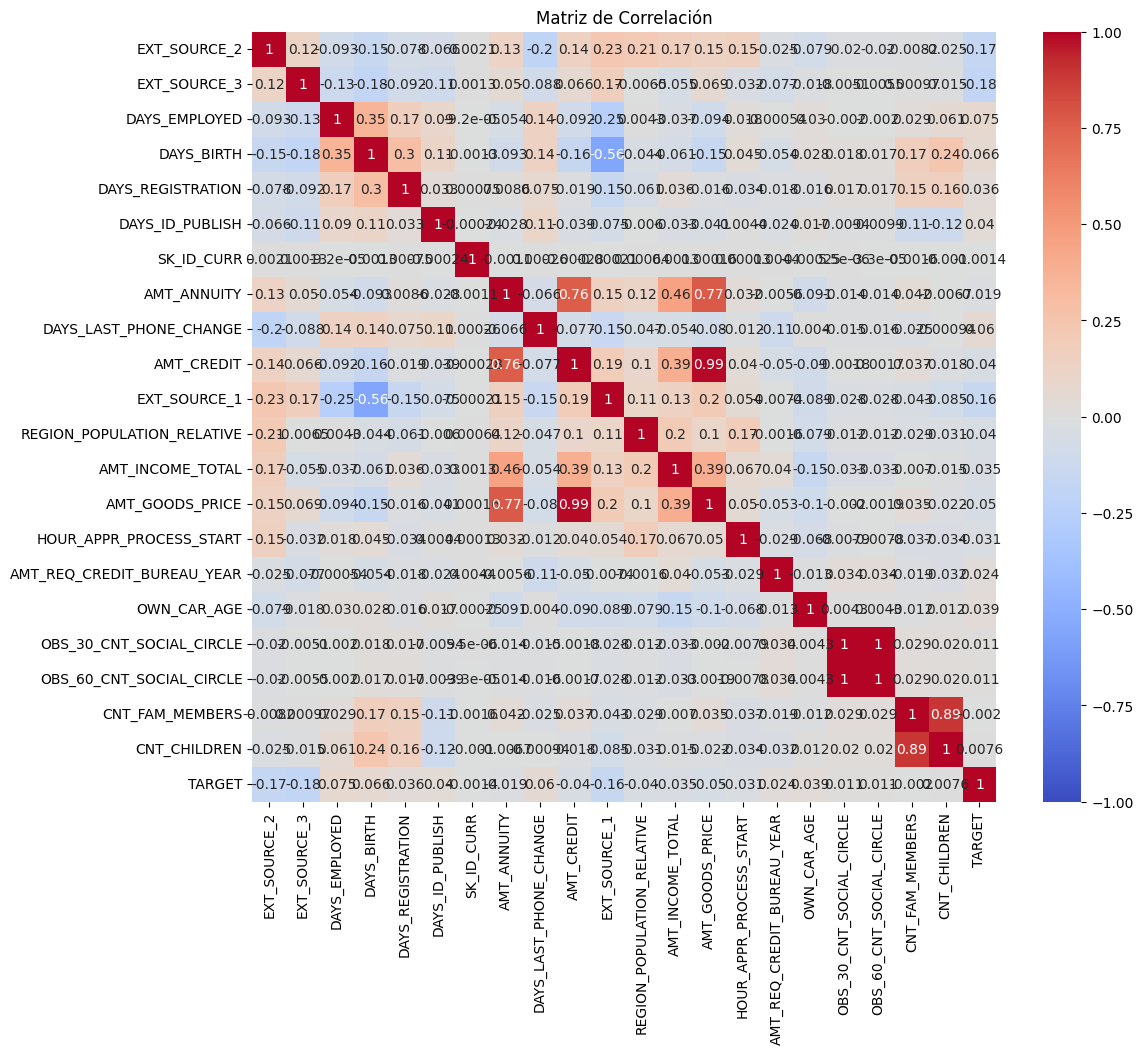

In [19]:
filtered_features = feature_importances[(feature_importances >= 0.01) & (feature_importances <= 0.06)]
filtered_features = filtered_features.sort_values(ascending=False)

filtered_features = filtered_features.index.to_list()
filtered_features.append('TARGET')
filtered_features
most_important_features_df = application_train_df[filtered_features]

# Calcula la matriz de correlación
corr_matrix = most_important_features_df.corr()

# Grafica la matriz de correlación usando seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

# XGBoost

In [20]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_application_train, Y_application_train)

Y_hat_xgb = model_xgb.predict(X_application_test)
accuracy_xgb = accuracy_score(Y_application_test, Y_hat_xgb)
print("Accuracy:", accuracy_xgb)

# AUC Score
Y_hat_xgb_prob = model_xgb.predict_proba(X_application_test)[:, 1]
auc_score = roc_auc_score(Y_application_test, Y_hat_xgb_prob)
print("AUC Score:", auc_score)


Accuracy: 0.9121427150341535
AUC Score: 0.7483570801033288


# TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_tf = Sequential()
model_tf.add(Dense(64, input_dim=X_application_train.shape[1], activation='relu'))
model_tf.add(Dense(32, activation='relu'))
model_tf.add(Dense(16, activation='relu'))
model_tf.add(Dense(8, activation='relu'))
model_tf.add(Dense(4, activation='relu'))
model_tf.add(Dense(2, activation='relu'))
model_tf.add(Dense(1, activation='relu'))

model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_tf.fit(X_application_train, Y_application_train, epochs=50, batch_size=32, validation_split=0.2)

Y_hat_tf = model_tf.predict(X_application_test)
Y_hat_tf = (Y_hat_tf > 0.5).astype(int)
accuracy_tf = accuracy_score(Y_application_test, Y_hat_tf)
print("Accuracy:", accuracy_tf)

# Test of Submission file with XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb

# Load training data
application_train_df = pd.read_csv('assets/application_train.csv')
application_test_df = pd.read_csv('assets/application_test.csv')

# Function to analyze null values
def null_values_analisis(_df: pd.DataFrame) -> pd.DataFrame:
    ''' This function analyzes the null values of a DataFrame and returns a DataFrame with the results '''
    
    null_values = _df.isnull().sum()
    null_values_percentage = (null_values / _df.shape[0]) * 100
    null_values_by_column = pd.concat([null_values, null_values_percentage], axis=1)
    null_values_by_column.columns = ['Missing Values (COUNT)', 'Missing Values (%)']
    null_values_by_column = null_values_by_column[null_values_by_column['Missing Values (COUNT)'] != 0]
    return null_values_by_column.sort_values(ascending=False, by='Missing Values (%)')

application_train_null_values_df = null_values_analisis(application_train_df)
application_train_null_values_df.head(50)

# Drop columns with suffixes _AVG, _MODE, _MEDI
cols_to_drop = application_train_df.columns[application_train_df.columns.str.contains(r'(_AVG$|_MODE$|_MEDI$)')]
application_train_df.drop(columns=cols_to_drop, inplace=True)

# Replace anomalous values
application_train_df['CODE_GENDER'] = application_train_df['CODE_GENDER'].replace('XNA', 'F')

# Encode categorical variables
label_encoder = LabelEncoder()
application_train_dtypes_df = application_train_df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
for categoric_col in application_train_dtypes_df.index:
    if application_train_df[categoric_col].nunique() <= 2:
        label_encoder.fit(application_train_df[categoric_col])
        application_train_df[categoric_col] = label_encoder.transform(application_train_df[categoric_col])

application_train_df = pd.get_dummies(application_train_df)

# Remove anomalies by Z-score
def remove_anomalies(df, columna, umbral=3):
    '''ArithmeticError function to remove anomalies by Z-score in a specific column'''
    
    z_scores = np.abs((df[columna] - df[columna].mean()) / df[columna].std())
    return df[z_scores <= umbral]

for col in ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL']:
    application_train_df = remove_anomalies(application_train_df, col)

# Prepare data for training
X = application_train_df.drop('TARGET', axis=1)
X_cols = X
Y = application_train_df['TARGET']
sc = StandardScaler()
X = sc.fit_transform(X)

# Load data for training
application_test_id = application_test_df['SK_ID_CURR']
application_test_df.drop(columns=cols_to_drop, inplace=True)
application_test_df['CODE_GENDER'] = application_test_df['CODE_GENDER'].replace('XNA', 'F')

for categoric_col in application_train_dtypes_df.index:
    if application_test_df[categoric_col].nunique() <= 2:
        application_test_df[categoric_col] = label_encoder.transform(application_test_df[categoric_col])

application_test_df = pd.get_dummies(application_test_df)
application_test_df = application_test_df.reindex(columns=X_cols.columns, fill_value=0)
application_test_df = sc.transform(application_test_df)

# Trainment with XGBoost
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X, Y)

# Predicts and evaluates the model
Y_hat_xgb_prob = model_xgb.predict_proba(application_test_df)[:, 1]

# Create submission file
submission_df = pd.DataFrame({'SK_ID_CURR': application_test_id, 'TARGET': Y_hat_xgb_prob})
submission_df.to_csv('submission_xgb.csv', index=False)

print("Submission file created successfully.")

# Load submission file
read_target_xgb = pd.read_csv('assets/submission_xgb.csv')
print(read_target_xgb.head(10))


# Test of Submission file with Tensor Flow

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load training data
application_train_df = pd.read_csv('assets/application_train.csv')
application_test_df = pd.read_csv('assets/application_test.csv')

# Function to analyze missing values
def null_values_analisis(_df: pd.DataFrame) -> pd.DataFrame:
    ''' This function analyzes the missing values of a DataFrame and returns a DataFrame with the results '''
    
    null_values = _df.isnull().sum()
    null_values_percentage = (null_values / _df.shape[0]) * 100
    null_values_by_column = pd.concat([null_values, null_values_percentage], axis=1)
    null_values_by_column.columns = ['Missing Values (COUNT)', 'Missing Values (%)']
    null_values_by_column = null_values_by_column[null_values_by_column['Missing Values (COUNT)'] != 0]
    return null_values_by_column.sort_values(ascending=False, by='Missing Values (%)')

application_train_null_values_df = null_values_analisis(application_train_df)
application_train_null_values_df.head(50)

# Drop columns with suffixes _AVG, _MODE, _MEDI
cols_to_drop = application_train_df.columns[application_train_df.columns.str.contains(r'(_AVG$|_MODE$|_MEDI$)')]
application_train_df.drop(columns=cols_to_drop, inplace=True)

# Replace anomalous values
application_train_df['CODE_GENDER'] = application_train_df['CODE_GENDER'].replace('XNA', 'F')

# Encode categorical variables
label_encoder = LabelEncoder()
application_train_dtypes_df = application_train_df.select_dtypes('object').apply(pd.Series.nunique, axis=0)
for categoric_col in application_train_dtypes_df.index:
    if application_train_df[categoric_col].nunique() <= 2:
        label_encoder.fit(application_train_df[categoric_col])
        application_train_df[categoric_col] = label_encoder.transform(application_train_df[categoric_col])

application_train_df = pd.get_dummies(application_train_df)

# Remove anomalies using Z-score
def remove_anomalies(df, columna, umbral=3):
    '''Function to remove anomalies using Z-score in a specific column'''
    
    z_scores = np.abs((df[columna] - df[columna].mean()) / df[columna].std())
    return df[z_scores <= umbral]

for col in ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_INCOME_TOTAL']:
    application_train_df = remove_anomalies(application_train_df, col)

# Prepare training data
X = application_train_df.drop('TARGET', axis=1)
X_cols = X
Y = application_train_df['TARGET']
sc = StandardScaler()
X = sc.fit_transform(X)

# Load and transform test data
application_test_id = application_test_df['SK_ID_CURR']
application_test_df.drop(columns=cols_to_drop, inplace=True)
application_test_df['CODE_GENDER'] = application_test_df['CODE_GENDER'].replace('XNA', 'F')

for categoric_col in application_train_dtypes_df.index:
    if application_test_df[categoric_col].nunique() <= 2:
        application_test_df[categoric_col] = label_encoder.transform(application_test_df[categoric_col])

application_test_df = pd.get_dummies(application_test_df)
application_test_df = application_test_df.reindex(columns=X_cols.columns, fill_value=0)
application_test_df = sc.transform(application_test_df)

# Build TensorFlow model
model_tf = Sequential()
model_tf.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model_tf.add(Dense(32, activation='relu'))
model_tf.add(Dense(16, activation='relu'))
model_tf.add(Dense(8, activation='relu'))
model_tf.add(Dense(4, activation='relu'))
model_tf.add(Dense(2, activation='relu'))
model_tf.add(Dense(1, activation='relu'))

# Compile the model
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_tf.fit(X, Y, epochs=50, batch_size=32, validation_split=0.2)

# Predictions and evaluation
Y_hat_tf_prob = model_tf.predict(application_test_df)

# Create submission file
submission_df = pd.DataFrame({'SK_ID_CURR': application_test_id, 'TARGET': Y_hat_tf_prob.flatten()})
submission_df.to_csv('submission_tf.csv', index=False)

print("Submission file created successfully.")

# Load submission file
read_target_tf = pd.read_csv('assets/submission_tf.csv')
print(read_target_tf.head(10))
